<a href="https://colab.research.google.com/github/m-ritam/ML/blob/main/K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/My Drive/Excel file to use in colab/SocialNetworkAds.csv")

Mounted at /content/drive


In [5]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [7]:
#Training & spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
#Fitting K-NN to training test
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =5, metric='minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
#predicting test set results
y_pred = classifier.predict(X_test)

In [14]:
#evaluating the model bt creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 0, 66],
       [ 0, 34]])

/tmp/ipython-input-316314490.py:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


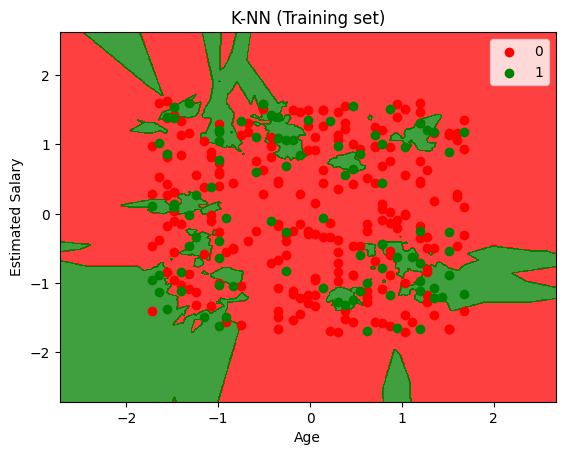

In [17]:
# Visualizing Training Set
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = X_train, y_train

# Creating grid
X1, X2 = np.meshgrid(
    np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01)
)

# Contour plot
plt.contourf(
    X1, X2,
    classifier.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Scatter points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
    )

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
